## Import data and some useful packages 

In [ ]:
import scipy
import numpy as np # manipulate N-dimensional arrays
import pandas as pd # data frame
import matplotlib.pyplot as plt # data plotting
import matplotlib.gridspec as gridspec
import seaborn # advanced data plotting
from sklearn import preprocessing # basic ML models
# import scipy # scientific computing library
from tqdm import tqdm #progress bar
import time

import tensorflow as tf

import time
import os
import pickle

In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

## Data visualization, normalization and separation

In [ ]:
train_images = train_images.reshape(60000, 28 , 28, 1)
test_images = test_images.reshape(10000, 28 , 28, 1)

In [ ]:
print('train shape:', train_images.shape)
print('test shape:', test_images.shape)

train shape: (60000, 28, 28, 1)
test shape: (10000, 28, 28, 1)


We normalize the data so that they belong to the interval [0, 1] (activation function = 'sigmoid')

In [ ]:
kitrain_images = train_images/255
test_images = test_images/255

In [ ]:
print(np.min(train_images),np.max(train_images))
print(np.min(test_images),np.max(test_images))

0 255
0.0 1.0


Visualization of an example of data coming from the train

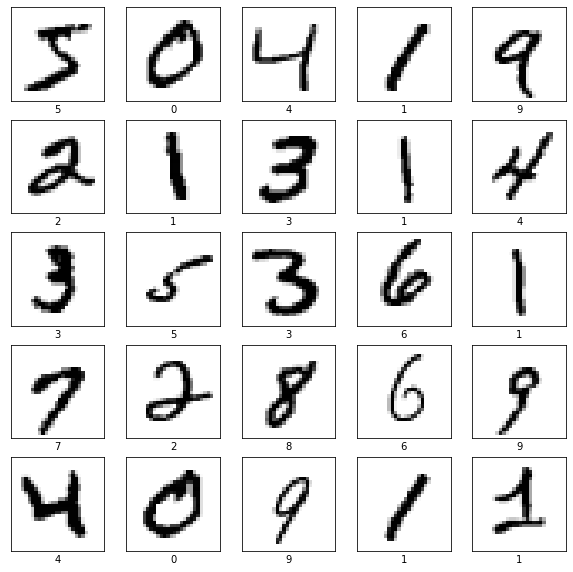

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape([28,28]), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

## Creation of 2 sub train bases (one with label and another without label)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_labeled, X_train_unlabeled, Y_train_labeled, Y_train_unlabeled = train_test_split(train_images, train_labels, test_size=59900, shuffle= True)

In [ ]:
print('train labeled shape:', X_train_labeled.shape)
print('train unlabeled shape:', X_train_unlabeled.shape)

train labeled shape: (100, 28, 28, 1)
train unlabeled shape: (59900, 28, 28, 1)


In [ ]:
num_classes = np.max(train_labels) + 1
print("num_classes = ", num_classes)
y_train = tf.keras.utils.to_categorical(Y_train_labeled, num_classes)
y_test = tf.keras.utils.to_categorical(test_labels, num_classes)

num_classes =  10


## 1. Training on only 100 labeled instances and prediction on everything

In [ ]:
from keras.models import Model,Sequential
from keras.layers import Input, Dense, BatchNormalization, Dropout, ReLU, Activation, Flatten, Conv2D, MaxPooling2D, Reshape

In [ ]:
from keras.backend import clear_session
clear_session()

CNN implementation

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size= (3, 3), padding='same', strides=(1, 1),
                 input_shape=X_train_labeled.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(filters = 32, kernel_size= (3, 3), padding='same', strides=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size= (3, 3), padding='same', strides=(1, 1)))
model.add(Activation('relu'))
model.add(Conv2D(filters = 64, kernel_size= (3, 3), padding='same', strides=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 128, kernel_size= (3, 3), padding='same', strides=(1, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.6))

model.add(Flatten())
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

training the model

In [ ]:
from keras.optimizers import Adam

In [ ]:
opt = Adam(lr=0.001)

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        1

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 10)

In [ ]:
hist_CNN = model.fit(X_train_labeled, y_train,
              batch_size=30,
              epochs=100,
              validation_split=0.1,
              shuffle=True,
              callbacks=[es])

Epoch 1/100
3/3 [==============================] - 3s 246ms/step - loss: 2.9271 - accuracy: 0.1319 - val_loss: 5.5221 - val_accuracy: 0.1000
Epoch 2/100
3/3 [==============================] - 0s 19ms/step - loss: 2.6152 - accuracy: 0.2542 - val_loss: 5.8957 - val_accuracy: 0.2000
Epoch 3/100
3/3 [==============================] - 0s 17ms/step - loss: 2.4899 - accuracy: 0.2556 - val_loss: 7.1535 - val_accuracy: 0.3000
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 2.4566 - accuracy: 0.3069 - val_loss: 8.1378 - val_accuracy: 0.3000
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 2.2850 - accuracy: 0.2847 - val_loss: 8.5535 - val_accuracy: 0.2000
Epoch 6/100
3/3 [==============================] - 0s 19ms/step - loss: 2.4325 - accuracy: 0.2028 - val_loss: 8.3259 - val_accuracy: 0.2000
Epoch 7/100
3/3 [==============================] - 0s 18ms/step - loss: 2.6360 - accuracy: 0.2111 - val_loss: 7.8716 - val_accuracy: 0.2000
Epoch 8/100
3/3 [==

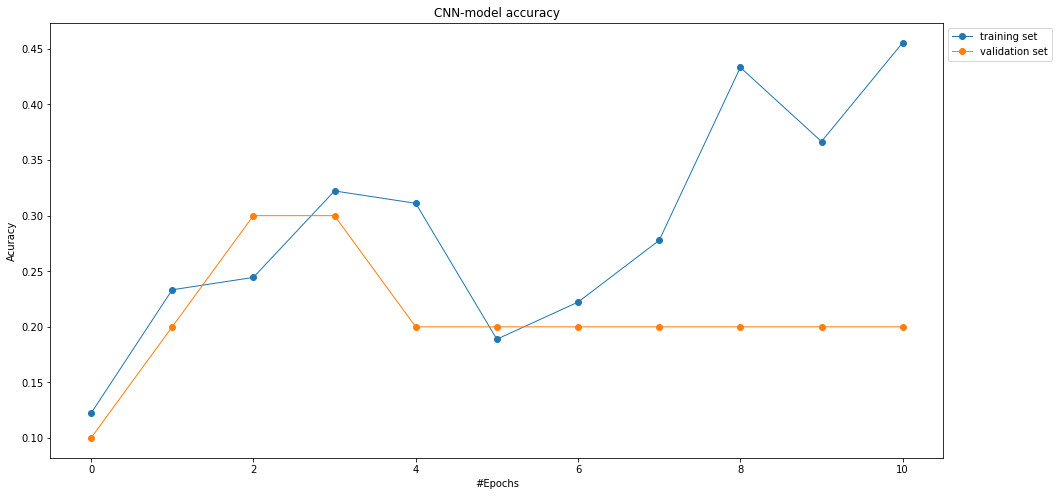

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(hist_CNN.history['accuracy'], label='training set',marker='o', linestyle='solid',linewidth=1, markersize=6)
plt.plot(hist_CNN.history['val_accuracy'], label='validation set',marker='o', linestyle='solid',linewidth=1, markersize=6)
plt.title("CNN-model accuracy")
plt.xlabel('#Epochs')
plt.ylabel('Acuracy')
plt.legend(bbox_to_anchor=( 1., 1.))

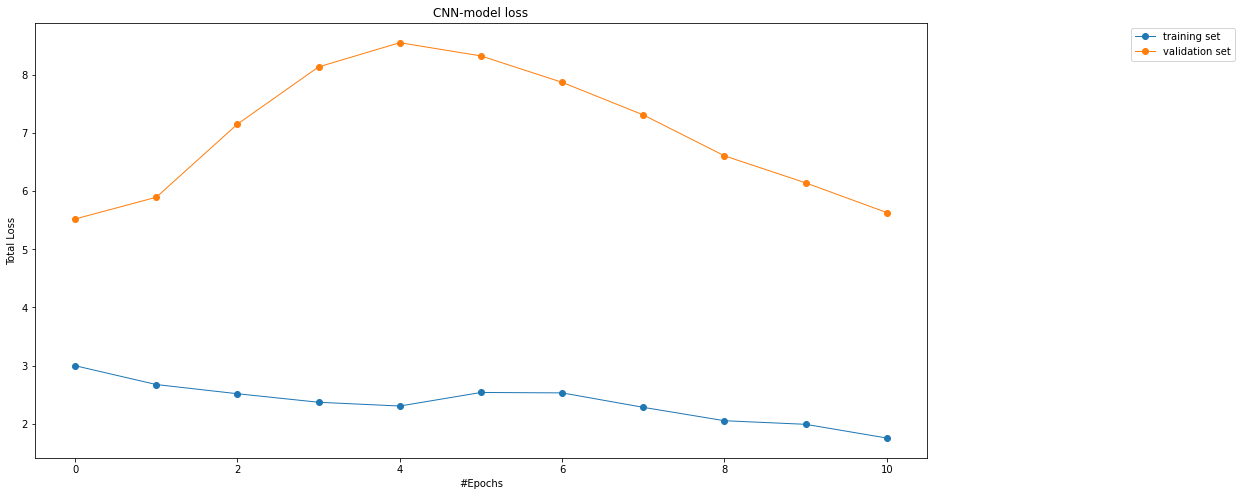

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(hist_CNN.history['loss'], label='training set',marker='o', linestyle='solid',linewidth=1, markersize=6)
plt.plot(hist_CNN.history['val_loss'], label='validation set',marker='o', linestyle='solid',linewidth=1, markersize=6)
plt.title("CNN-model loss")
plt.xlabel('#Epochs')
plt.ylabel('Total Loss')
plt.legend(bbox_to_anchor=( 1.35, 1.))

In [ ]:
print('\n# Evaluate on test data')
results = model.evaluate(test_images, y_test, batch_size=128)
print('test loss, test acc:', results)


# Evaluate on test data
79/79 [==============================] - 1s 5ms/step - loss: 3.5658 - accuracy: 0.1135
test loss, test acc: [3.565798044204712, 0.11349999904632568]


## 2. Semi supervised Learning with GANs

a) CNN generator and discriminator Configuration

In [ ]:
dim_x=X_train_unlabeled.shape[1]*X_train_unlabeled.shape[2]
dim_z=100

In [ ]:
y_train = tf.keras.utils.to_categorical(Y_train_labeled, num_classes + 1)

In [ ]:
def make_generator():
  model = Sequential()
  model.add(Dense(128, use_bias=False, input_shape=(dim_z,)))
  model.add(ReLU())
  model.add(Dense(dim_x, use_bias=False))
  model.add(Activation("sigmoid"))
  model.add(Reshape(target_shape=(28,28,1)))

  return(model)

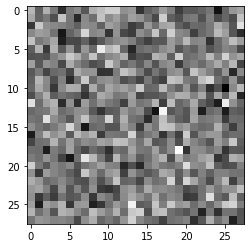

In [ ]:
generator = make_generator()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [ ]:
generated_image.shape

TensorShape([1, 28, 28, 1])

In [ ]:
def make_discriminator():
  model = Sequential()

  model.add(Conv2D(filters = 32, kernel_size= (3, 3), padding='same', strides=(1, 1),
                 input_shape=X_train_labeled.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(filters = 32, kernel_size= (3, 3), padding='same', strides=(1, 1)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters = 64, kernel_size= (3, 3), padding='same', strides=(1, 1)))
  model.add(Activation('relu'))
  model.add(Conv2D(filters = 64, kernel_size= (3, 3), padding='same', strides=(1, 1)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(filters = 128, kernel_size= (3, 3), padding='same', strides=(1, 1)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.6))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes+1))
  model.add(Activation('softmax'))

  return(model)

In [ ]:
discriminator = make_discriminator()
decision = discriminator(generated_image)
print (decision)

tf.Tensor(
[[0.09021495 0.08987802 0.09412114 0.09109326 0.08930913 0.09151919
  0.08995157 0.09158561 0.08868527 0.09309503 0.09054688]], shape=(1, 11), dtype=float32)


In [ ]:
categorical_cross_entropy = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

In [ ]:
categorical_cross_entropy(y_train,discriminator(X_train_labeled, training = True))

<tf.Tensor: shape=(), dtype=float32, numpy=2.870053>

b) Define the loss function and the optimizers

The idea is that the discriminator will serve as a classifier.
We will have labeled, unlabeled and noise data available.
Our GAN will predict 11 classes (10 real classes and 1 fake class).

For the generator, we use feature matching.

For the discriminator, we consider the supervised loss and the unsupervised loss:

$$ L = L_{supervised} + L_{unsupervised} $$

Where $L_{unsupervised}$ is the usual loss of the discriminator and $L_{supervised}$ is the loss of the classification achieved.
$$ L_{unsupervised} = \mathbb{E}_{x\sim P_{data}(x)}\big[\log (1-p(y=K+1|x,D))\big]+\mathbb{E}_{z\sim P(z)}\big[\log p(y=K+1|G(z),D))\big] $$

$$ L_{supervised} = \mathbb{E}_{x\sim P_{data}(x)}\big [\log(p(y|x,y<K+1))\big] $$



In [ ]:
#binary_cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [ ]:
def generator_loss(data_output, gen_output):
    mom_data = tf.keras.backend.mean(data_output, axis = 0)
    #print(mom_data.shape)
    mom_gen = tf.keras.backend.mean(gen_output, axis = 0)
    return tf.keras.losses.MSE(mom_data, mom_gen)

In [ ]:
def discriminator_loss(real_labeled, labeled_output): #, real_output, fake_output):
    supervised_loss = categorical_cross_entropy(y_true=real_labeled, y_pred = labeled_output)

    #real_loss = binary_cross_entropy(y_true=tf.ones_like(real_output), y_pred=real_output)
    #fake_loss = binary_cross_entropy(y_true=tf.zeros_like(fake_output), y_pred=fake_output)
    #unsupervised_loss = real_loss + fake_loss
    
    total_loss = supervised_loss #+ unsupervised_loss
    return total_loss

In [ ]:
generator_optimizer = tf.keras.optimizers.Adam(lr=1e-3)
discriminator_optimizer = tf.keras.optimizers.Adam(lr=1e-3)

c) Training

In [ ]:
def train_step_label(images_unlab,images_lab,labeled,K):
    z = tf.random.normal([len(images_unlab), dim_z])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(z, training=True)

      lab_output = discriminator(images_lab, training=True)
      unlab_output = discriminator(images_unlab, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output, unlab_output)
      disc_loss = discriminator_loss(labeled, lab_output) # lab_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return(disc_loss,gen_loss)

In [ ]:
EPOCHS = 50
BATCH_SIZE = 256
BUFFER_SIZE = 59900
DISPLAY_STEP = 20

In [ ]:
g = []
d = []

for epoch in tqdm(np.arange(0,EPOCHS)):

  ind = np.random.choice(np.arange(BUFFER_SIZE),BATCH_SIZE - 100)
  train_dataset = np.concatenate((X_train_unlabeled[ind,:],X_train_labeled),axis = 0)
  
  ts = train_step_label(train_dataset, X_train_labeled,y_train, num_classes)
  d.append(ts[0])
  g.append(ts[1])

100%|██████████| 50/50 [00:03<00:00, 13.89it/s]


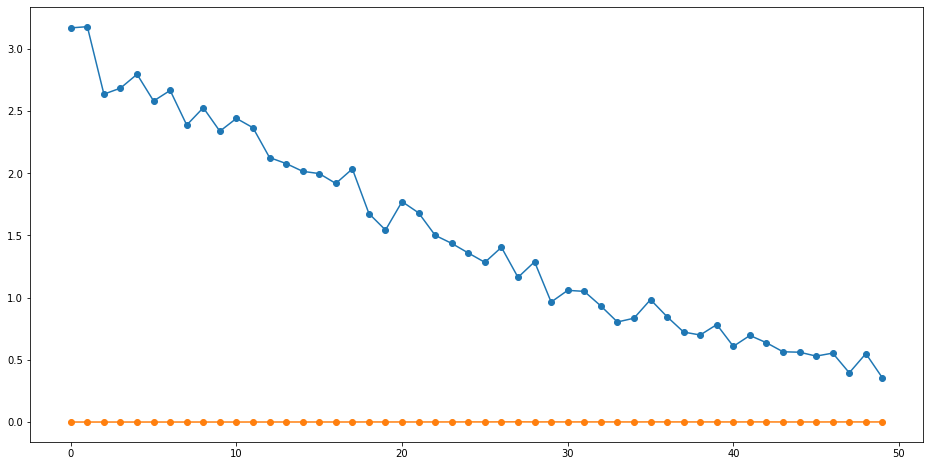

In [ ]:
plt.figure(figsize=(16, 8))
plt.plot(d,marker='o')
plt.plot(g,marker='o')
plt.show()

In [ ]:
y_pred = discriminator(test_images).numpy()

In [ ]:
y_pred = tf.keras.utils.to_categorical(np.argmax(y_pred, axis = 1), num_classes + 1)

In [ ]:
y_test = tf.keras.utils.to_categorical(test_labels, num_classes + 1)

In [ ]:
y_test[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
y_pred[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
import sklearn

In [ ]:
print("Accuracy = ", sklearn.metrics.accuracy_score(y_test,y_pred))

Accuracy =  0.1135


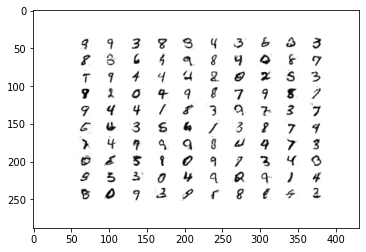

In [ ]:
img=plt.imread("generated_plot_9600.png")
plt.imshow(img)

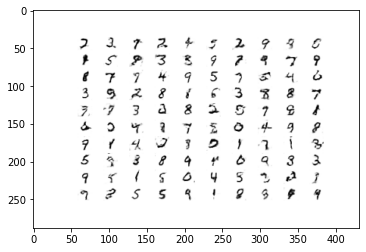

In [ ]:
img=plt.imread("generated_plot_3600.png")
plt.imshow(img)

We can clearly see that the data generated by the generator improves after each epoch